In [1]:
nodes: set[str] = set()
edges: dict[tuple[str, str], bool] = {}


with open('23.txt') as f:
    for line in f.readlines():
        a, b = line.strip().split('-')
        nodes.add(a)
        nodes.add(b)
        edges[a, b] = True
        edges[b, a] = True

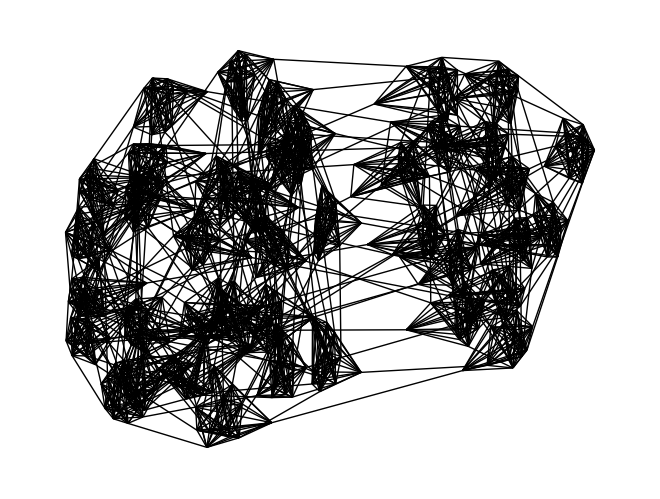

In [2]:
from networkx import Graph, draw

draw(Graph(edges.keys()), node_size=0)

# Part 1: Triangles

In [3]:
def triangles[T](nodes: set[T], edges: list[tuple[T, T]]):
    for a, b in edges:
        for c in nodes:
            if (a, c) in edges and (b, c) in edges:
                yield tuple(sorted((a, b, c)))

TRIANGLES = set(triangles(nodes, edges))
len(TRIANGLES)



11011

In [4]:
p1 = 0
for a, b, c in TRIANGLES:
    if a[0] == 't' or b[0] == 't' or c[0] == 't':
        p1 += 1
p1

1368

# Part 2: Largest fully-connected cluster

Let's make the **assumption** that the most-connected node is the one inside the largest fully-connected subgraph:

In [5]:
from collections import Counter

connections = Counter(n for edge in edges for n in edge)
mc = connections.most_common()
mc[0], mc[-1]

(('no', 26), ('dd', 26))

Ah. It seems every node has the same number of connections... how sneaky! We're going to have to get more creative.

In [6]:
def subgraphs(subset: set = set()):
    any_additions = False
    for n in nodes:
        if n in subset:
            continue
        if all((a, n) in edges for a in subset):
            any_additions = True
            yield from subgraphs(subset | {n})
            # We have (at least a square), so bold assumption:
            # this will be enough to grow out a subgraph
            break
    
    if not any_additions:
        yield subset

def all_subgraphs():
    for t in TRIANGLES:
        yield from subgraphs(set(t))

greatest = max(all_subgraphs(), key=len)
print(','.join(sorted(list(greatest))))

dd,ig,il,im,kb,kr,pe,ti,tv,vr,we,xu,zi
